# Karar Ağaçları - Demo 0



# 1. Karar Ağacı Teorik Tanımlar

Karar ağaçları, Sınıflandırma ve Regresyon problemlerinde kullanılan ağaç tabanlı algoritmalardan biridir. Karmaşık veri setlerinde kullanılabilir.

Karar ağaçları düğüm olarak üç kısımdan oluşur;

* kök düğümü (root nodes)
> Karar ağaçlarının ilk hücrelerine kök düğüm denir.
* ara düğümler (interval nodes)
> Kök düğümün ve diğer ara düğümlerin altında bulunan ara düğümlerdir. Her gözlem düğümler kullanılarak sınıflandırılır. Düğüm sayısı arttıkça modelin karmaşıklığı da artar.
* yapraklar (leaf nodes)
> Karar ağacının alt kısmında yaprak düğüm bulunur. Yaprak düğümleri bize sonucu verir.

Her gözlem, düğüm durumuna bağlı olarak "Evet" veya "Hayır" olarak sınıflandırılır.

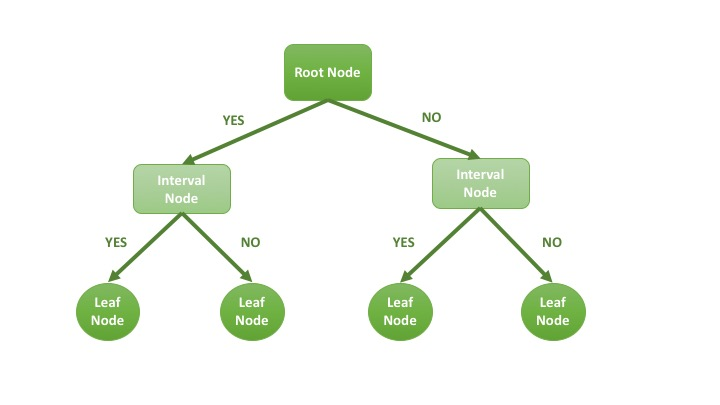

**Karar Ağacı Algoritması**

Karar ağaçlarının oluşturulması, en saf sınıf dağılımını bulana kadar devam eder. Sınıf dağılımları saf değilse, ağaç özellikleri ile veriler bölünmeye devam eder (düğümler oluşturur)


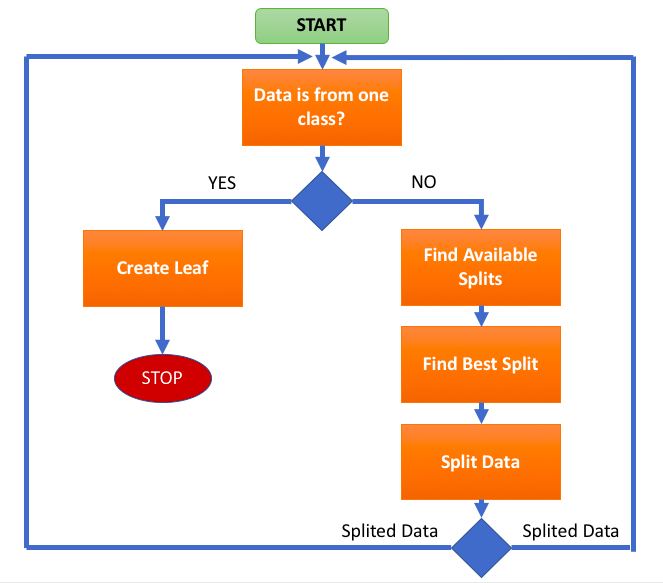

**En İyi Bölünmeleri Bulmak**

Veri setimizi mümkün olduğunca iyi tanımlayan seçim düğümünü bulmak istiyoruz.

Bir düğümü seçmek için bazı yöntemler şunlardır;
- Bilgi Kazancı (Information Gain)
- Gini İndeksi (Gini Index)


# 1.1. Bilgi Kazancı (Information Gain)

Bilgi Kazancı, Gini İndeksi gibi karar ağaçlarını oluşturmak için kullanılır.
Bilgi Kazancı, bir veri kümesini seçilen özelliğe göre bölerek entropideki azalmayı ölçer.


**Entropi Nedir?**

Entropi, veri setinin belirsizliğinin ölçüsüdür.

Aşağıdaki formülle hesaplanır;

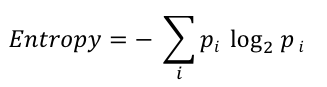




**Örnek:**
Yolcunun Sex(Cinsiyet) ve Title(Unvan) özelliklerine göre Titanic'de Hayatta Kalma (Survived) tahmini için örnek bir eğitim seti oluşturalım.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_data_dict = {
        'Title': ['Mrs', 'Master', 'Mrs', 'Master', 'Mr', 'Mr'],
        'Sex': ['F', 'M', 'F', 'F', 'M', 'M'],
        'Survived' : [1, 1, 1, 0, 1, 0]
        }

train_data = pd.DataFrame(train_data_dict, columns = ['Title', 'Sex', 'Survived'])

train_data.head()

Aşağıdakiler hesaplayalım;
* Tüm sistemin entropisi (Hayatta kaldı-Survived)
* Karar ağacının kök düğümü için Sex(Cinsiyet) özelliğini seçersek, Cinsiyet özelliğinin entropisi
* Karar ağacının kök düğümü için Title(Unvan) özelliğini seçersek, Unvan özelliğinin entropisi

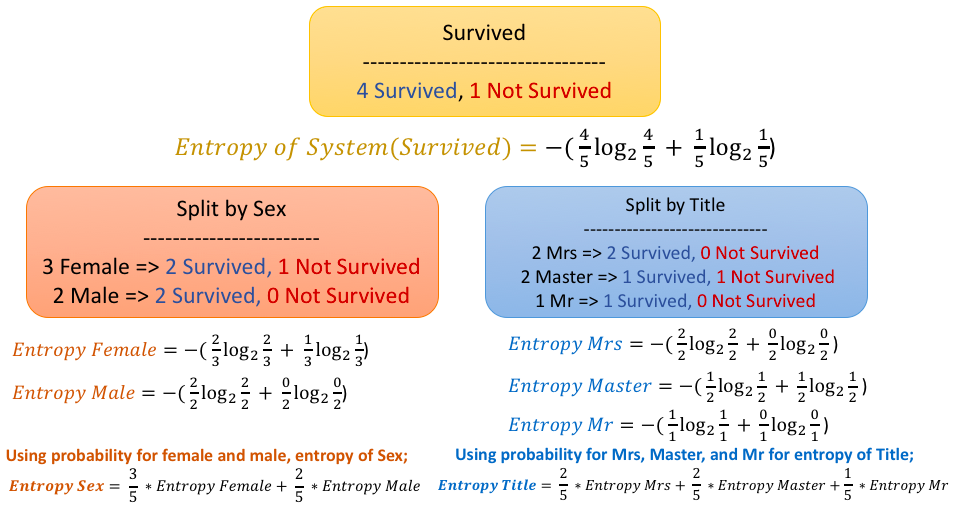

In [ ]:
from math import log
from math import log2

#Entropy of System
entropy_system = -(4/5 * log2(4/5) + 1/5 * log2(1/5))

#Entropy of Splitting by Sex Feature
entropy_female = -(2/3 * log2(2/3) + 1/3 * log2(1/3))
entropy_male = -(2/2 * log2(2/2))

entropy_sex = 3/5 * entropy_female + 2/5 * entropy_male

#Entropy of Splitting by Title Feature
entropy_mrs = -(2/2 * log2(2/2))
entropy_master = -(1/2 * log2(1/2) + 1/2 * log2(1/2))
entropy_mr = -(1/1 * log2(1/1))

entropy_title = 2/5 * entropy_mrs + 2/5 * entropy_master + 1/5 * entropy_mr

print('Entropy of System: %f' % (entropy_system))
print('Entropy Sex: %f' % (entropy_sex))
print('Entropy Title: %f' % (entropy_title))

In [ ]:
#entropy_system = -(2/5 * log2(2/5) + 3/5 * log2(3/5))
#entropy_system

Gösterildiği gibi, Title (Unvan) özelliğinin entropisinden ziyade Sex(Cinsiyet) özelliğinin entropisi daha yüksektir. Sex özelliğinin Title özelliğinden daha belirsiz olduğunu söyleyebiliriz.

Title(Unvan) özelliği daha kesin olduğu için verileri daha kesin olarak bölebilir.

**Bilgi kazancı, veri kümesi bölünmesinden sonra veri kümesi belirsizliğinin ne kadar azaldığının ölçüsüdür.**

Aşağıdaki gibi formülize edilir;

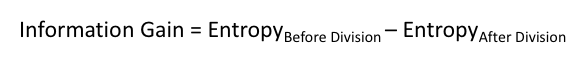

In [ ]:
information_gain_sex = entropy_system - entropy_sex
information_gain_title = entropy_system - entropy_title

print('Information Gain of Sex: %f' % (information_gain_sex))
print('Information Gain of Title: %f' % (information_gain_title))

# 1.2. Gini Indeksi (Gini Index)

Gini değeri 0 ile 1 arasında bir sonuç alır.

0'a yakın değerler karar ağacında daha iyi ayrım sağlar.

Düğüm için minimum Gini indeks değerine sahip özelliği seçiyoruz.

Gini Index formulü;

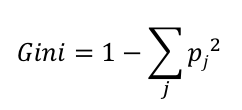

**Gini Hesaplama Örneği**

Titanic veri setinde Gini of Sex özelliğini Survived yolcu olasılığına göre hesaplamak istersek: 

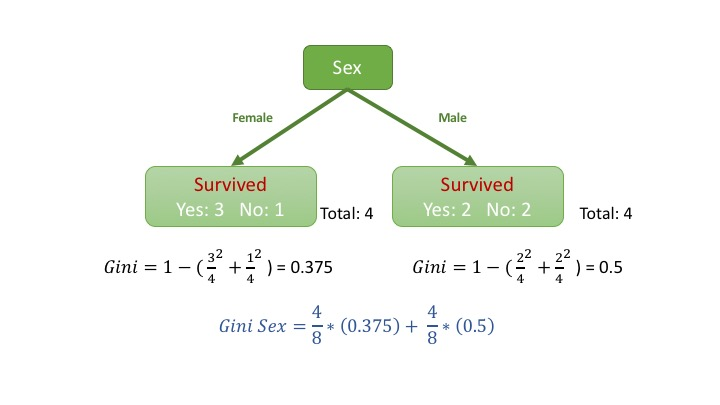

# 2. Titanic Dataset ile Karar Ağacı Uygulaması

In [ ]:
#ROOT_DIR = "/content/drive/MyDrive/CASGEM-Egitim/Egitim-Part1/Day7-DecisionTree/notebooks"
ROOT_DIR = "https://media.githubusercontent.com/media/yapay-ogrenme/casgem-eu-project-training-on-data-mining-2nd/main/PART1/Day7-DecisionTree/notebooks/"

DATASET_PATH = ROOT_DIR + "/datasets/"

In [ ]:
train_data = pd.read_csv(DATASET_PATH + "titanic_train_preprocessed.csv")
train_data.columns

In [ ]:
y = train_data['Survived']

**Kategorik Öznitelikler için One Hot Encoding**


In [ ]:
features = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked", "Family_Size", "Travelled_Together",
            "Title", "Marry_Status"]
            
X = pd.get_dummies(train_data[features])

**Standard Scaler ile Normalizasyon**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaler = scaler.transform(X)

**Veriyi eğitim ve test olarak bölelim**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.20, random_state=0)

**Eğitim & Tahmin**

GridSearchCV yöntemini kullanarak karar ağacı için en iyi parametreleri hesaplıyoruz.

* criterion

> Bir bölünmenin kalitesini ölçme işlevi. Desteklenen kriterler Gini safsızlığı(Gini impurity) için "gini" ve bilgi kazancı(information gain) için "entropi"dir.

* splitter

> Her düğümde bölmeyi seçmek için kullanılan strateji. Desteklenen stratejiler, en iyi bölmeyi seçmek için “best” ve en iyi rastgele bölmeyi seçmek için “random” dir.

* max_depth

> Ağacın maksimum derinliği. "None" ise, tüm yapraklar saf olana veya tüm yapraklar min_samples_split örneklerinden daha azını içerene kadar düğümler genişletilir.

* min_samples_split

> Bir dahili düğümü bölmek için gereken minimum örnek sayısı

* min_samples_leaf

> Bir yaprak düğümde olması gereken minimum örnek sayısı

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
import numpy as np
np.random.seed(0)
import random as rn
rn.seed(0)

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[ 2, 3, 4, 6, 8, 10], 
    "min_samples_leaf":list(range(1, 20)), 
}

clf = DecisionTreeClassifier(random_state=0)

tree_cv = GridSearchCV(clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))